In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy.signal import convolve2d
#Dùng để áp dụng phép tích chập 2D , làm mờ ảnh 

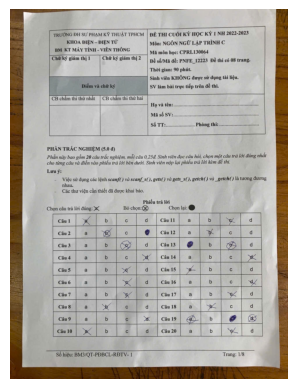

In [2]:
image = cv2.imread('hinh3.jpg')

# Chuyển ảnh từ BGR (OpenCV) sang RGB (Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh
plt.imshow(image_rgb)
plt.axis('off')  # Tắt trục toạ độ
plt.show()

In [3]:
def crop_document(image_path, output_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    doc_contour = contours[0] if contours else None
    
    if doc_contour is not None:
        x, y, w, h = cv2.boundingRect(doc_contour)
        cropped_image = image[y:y+h, x:x+w]
        cv2.imwrite(output_path, cropped_image)
        
        # Hiển thị ảnh đã cắt
        plt.figure(figsize=(8, 10))
        plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title("Ảnh đã cắt")
        plt.show()
     
    return cropped_image

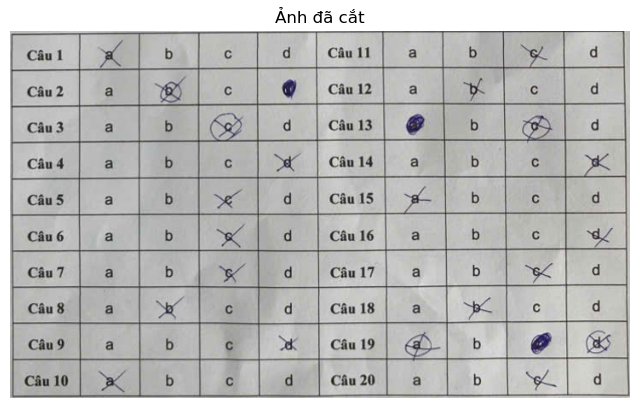

In [4]:
image_path = 'hinh3.jpg'  # Đường dẫn ảnh đầu vào
output_image = 'anhcat.jpg'  # Đường dẫn ảnh cắt ra
cropped_image = crop_document(image_path, output_image)


Kích thước ảnh xám: (431, 728)
uint8


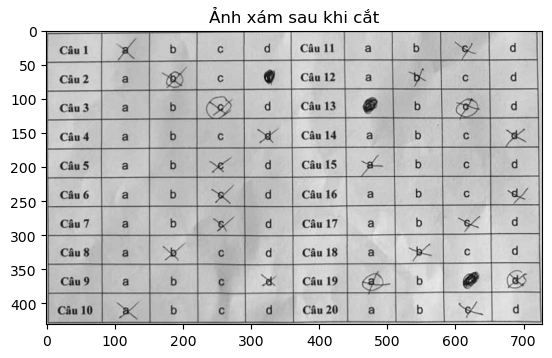

In [5]:
gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
print('Kích thước ảnh xám:', gray.shape)
print(gray.dtype)
plt.imshow(gray, cmap='gray')
plt.title("Ảnh xám sau khi cắt")
plt.show()

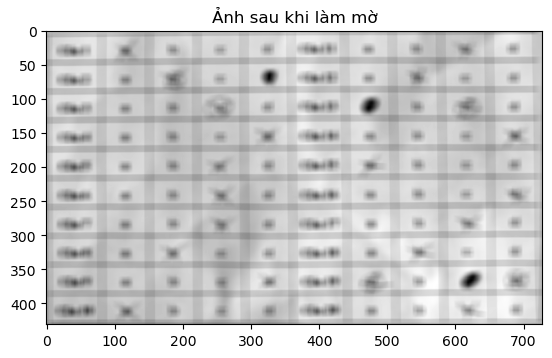

In [6]:
K = np.ones((10, 15)) / (10 * 15)
Out = convolve2d(gray, K, boundary='symm', mode='same')
plt.imshow(Out, cmap='gray')
plt.title("Ảnh sau khi làm mờ")
plt.show()

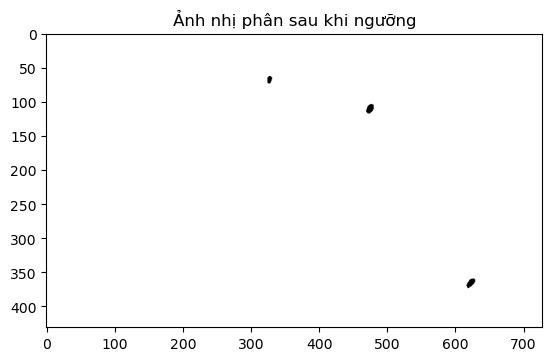

In [7]:
threshold = 85
binaryimg = Out > threshold
plt.imshow(binaryimg, cmap='gray')
plt.title("Ảnh nhị phân sau khi ngưỡng")
plt.show()